### `Huggingface` link deployment : https://huggingface.co/spaces/Iqbaljanitra/brandshoesprediction_nike_converse_adidas

### Name : Iqbal Janitra

# IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from pathlib import Path
!pip install -q jmd_imagescraper
from jmd_imagescraper.core import *
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import random
from keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape
import glob

# DATA LOADING

In [2]:
train_dir = "/Users/iqbaljanitra/Documents/PHASE 3/MILESTONE/MILESTONE 2/archive-6/test"
test_dir = "/Users/iqbaljanitra/Documents/PHASE 3/MILESTONE/MILESTONE 2/archive-6/train"

The `os.listdir` function returns a list of all the filenames in the specified directory. The code then creates three separate lists of filenames, one for each of the subdirectories: adidas, converse, and nike.

In [3]:
adidas_files = os.listdir("archive-6/train/adidas")
converse_files = os.listdir("archive-6/train/converse")
nike_files = os.listdir("archive-6/train/nike")

This code is using the `random.sample` function to randomly select `8 filenames` from each of the lists of filenames created in the previous code snippet. The random.sample function takes two arguments: a list and an integer, and returns a list of the specified number of random elements from the input list.

In [4]:
rand_adidas = random.sample(os.listdir("archive-6/train/adidas"), 8)
rand_converse = random.sample(os.listdir("archive-6/train/nike"), 8)
rand_nike = random.sample(os.listdir("archive-6/train/converse"), 8)

# PROBLEM STATEMENT

The goal of the image `classification model`, To build a `Convolutional Neural Network (CNN)` model for this image classification task is to predict the brand of a shoes given an image of the shoes. The 3 classes in question are `Adidas, Converse, and Nike`. The training data for the model consists of images of shoes and their corresponding labels, with each label indicating the brand of the shoe in the image.

So, the conclusion is that building a `CNN mode`l for the image `classification` task of predicting the brand of a shoe given an image of the shoe involves preprocessing the training data, splitting it into a training set and a validation set, designing a suitable model architecture, `training the model, and evaluating its performance.`

# EXPLORATORY DATA ANALYSYS

In [5]:
print("Number of Adidas images: ", len(adidas_files))
print("Number of Converse images: ", len(converse_files))
print("Number of Nike images: ", len(nike_files))

Number of Adidas images:  237
Number of Converse images:  237
Number of Nike images:  237


In [6]:
classes = ['adidas', 'converse', 'nike']

this code is used for `Exploratory Data Analysis (EDA)`, where you load the images and their labels into arrays for further analysis. The images are read using the cv2.imread function and stored in the train_images array, while their corresponding labels are stored in the train_labels array. The labels are assigned by finding the index of the class name in the classes list. This is useful for getting a sense of the dataset, understanding the distribution of the classes, and `checking the quality of the images`, among other things.

In [7]:
train_images = []
train_labels = []
for cls in classes:
    cls_dir = os.path.join(train_dir, cls)
    for image_name in os.listdir(cls_dir):
        image_path = os.path.join(cls_dir, image_name)
        image = cv2.imread(image_path)
        train_images.append(image)
        train_labels.append(classes.index(cls))

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [8]:
train_images.shape

(114, 240, 240, 3)

This code is plotting 2 rows and 5 columns of images from the training data. The images are plotted using the imshow function from matplotlib, and the corresponding label is set as the title of each plot.

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.tight_layout()

for i, ax in enumerate(axs.ravel()):
    if i < 10:
        ax.imshow(train_images[i])
        ax.set_title(classes[train_labels[i]])
    else:
        ax.axis('off')

Text(0.5, 1.0, 'Train Data Distribution')

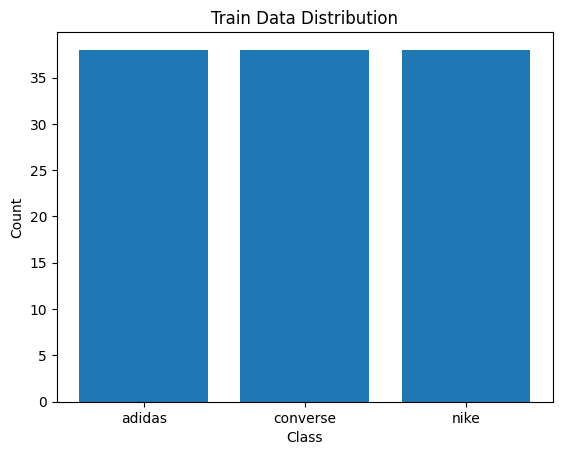

In [38]:
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, align='center')
plt.xticks(unique, classes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Train Data Distribution')

### Data Train Distribution

it appears that the purpose of this code is to extract the height and width information for a collection of images stored in the list train_images. The code iterates over each image in train_images and uses the shape attribute of the image to determine its height and width. The height and width values are then appended to the lists heights and widths, respectively.

In [49]:
heights = []
widths = []
for image in train_images:
    heights.append(image.shape[0])
    widths.append(image.shape[1])

it appears that the purpose of this code is to create a histogram plot of the distributions of the heights and widths of the images stored in the heights and widths lists, respectively. the histograms of the distributions would show two identical plots, each with a peak at the same value and with the same count values for each bin. This would indicate that all of the images in the collection have the same height and width, which is a unique and unusual characteristic for a collection of images.

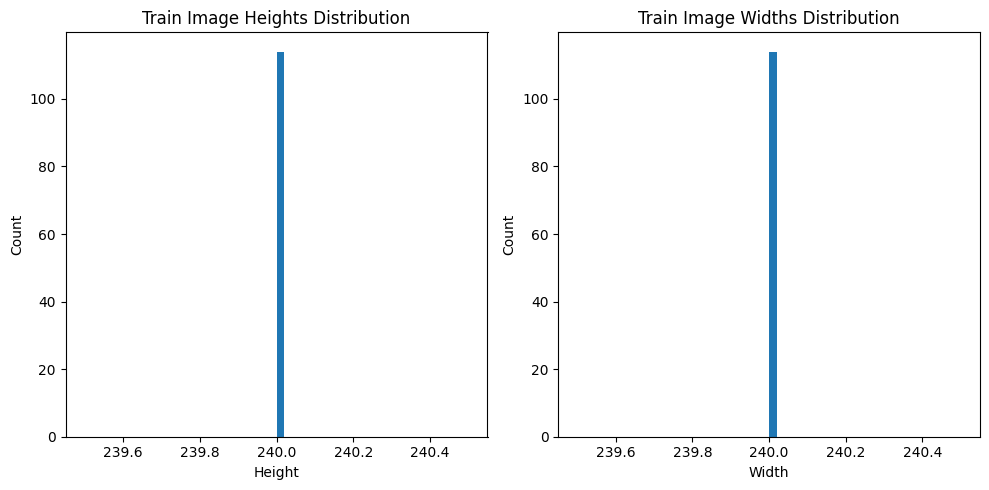

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(heights, bins=50)
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Count')
axs[0].set_title('Train Image Heights Distribution')

axs[1].hist(widths, bins=50)
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Count')
axs[1].set_title('Train Image Widths Distribution')

plt.tight_layout()
plt.show()


### EDA USING RANDOM IMAGE

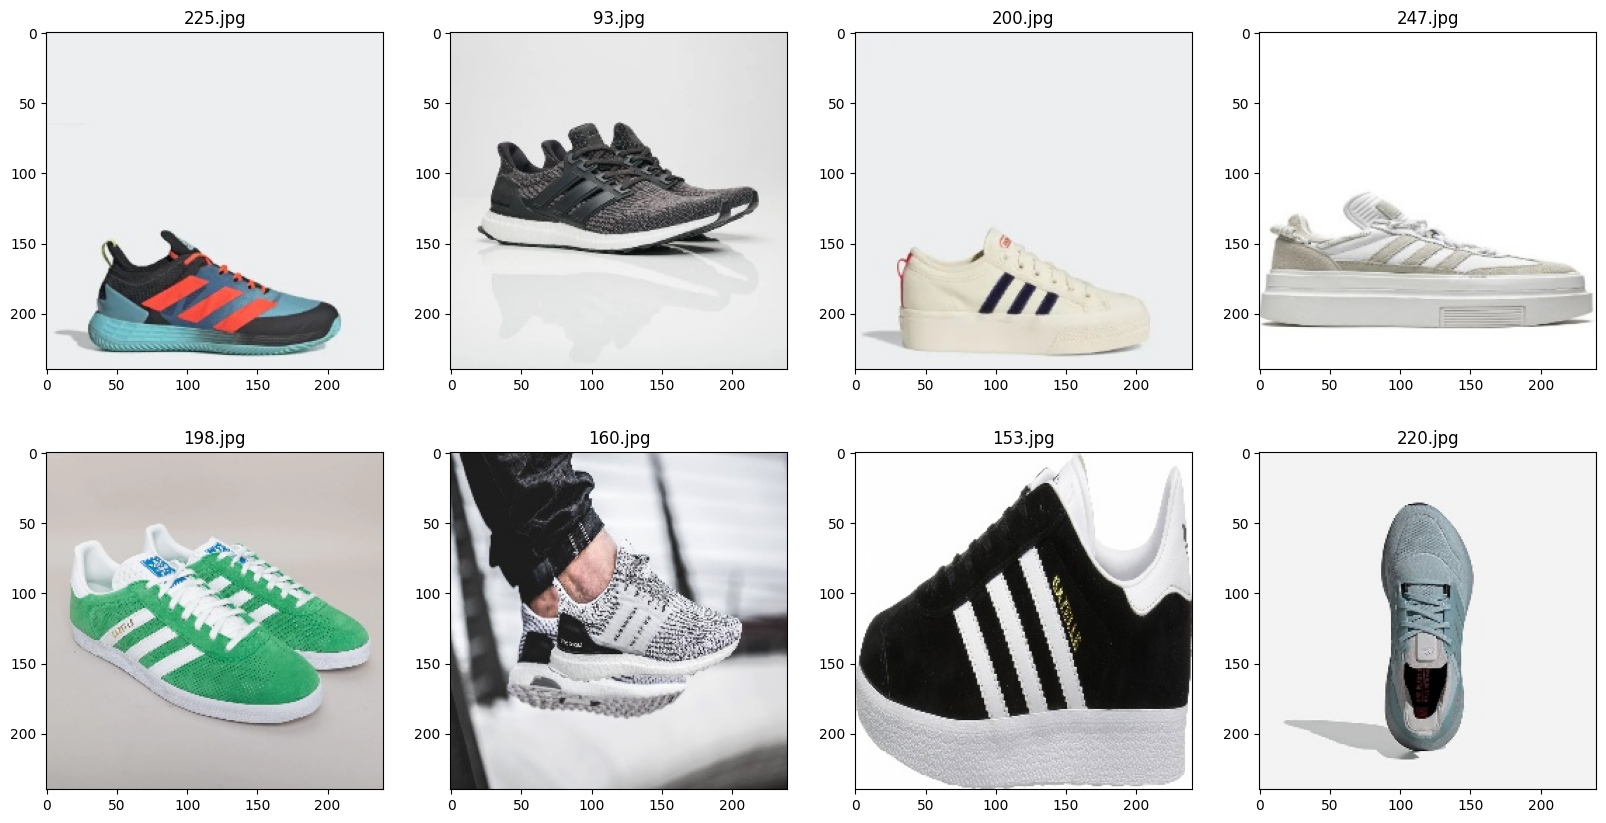

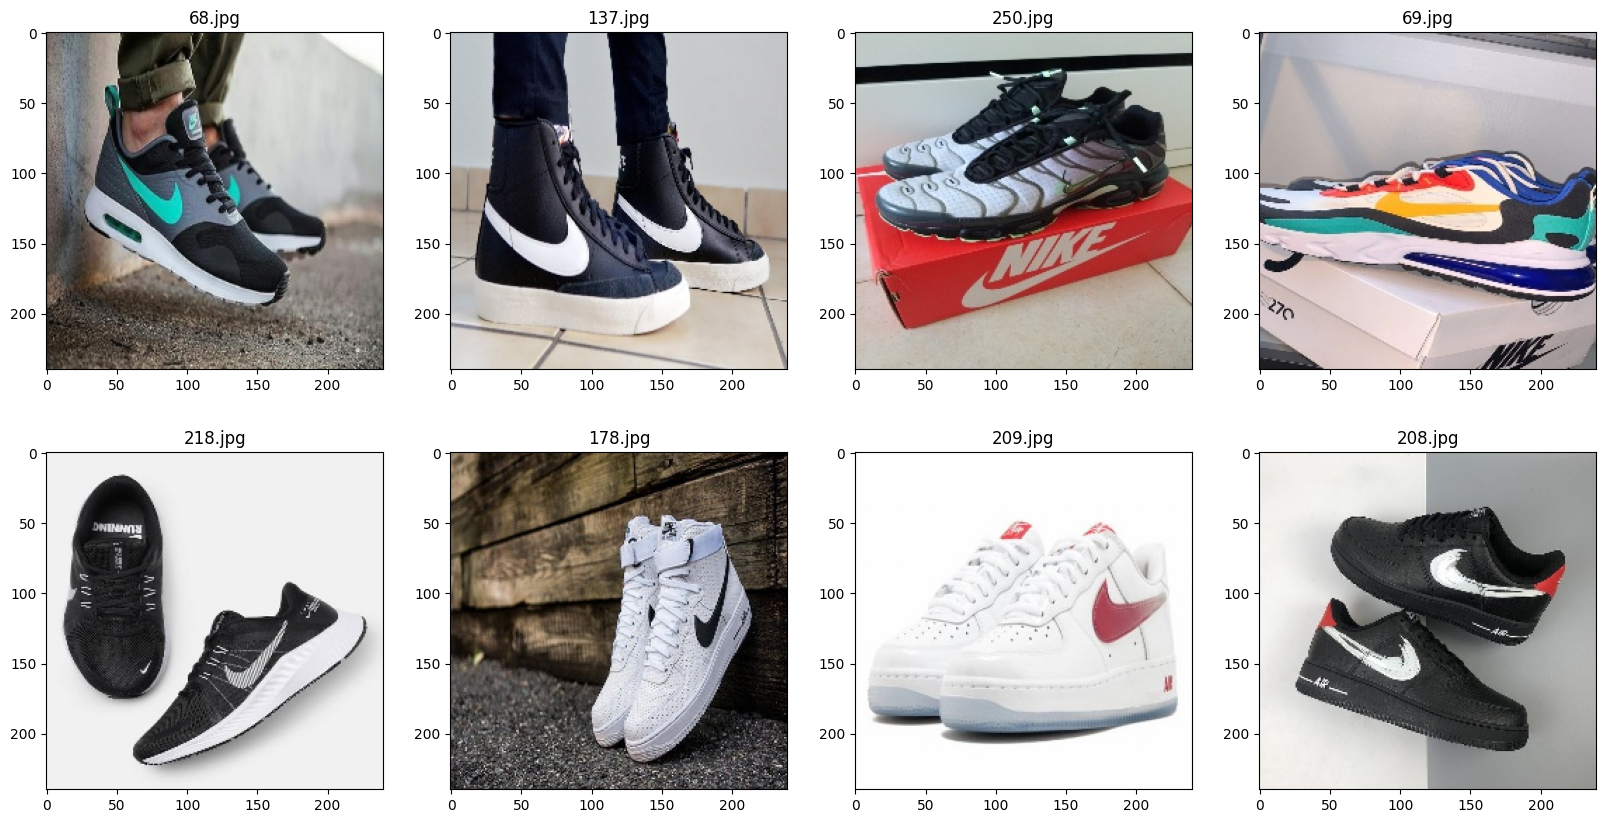

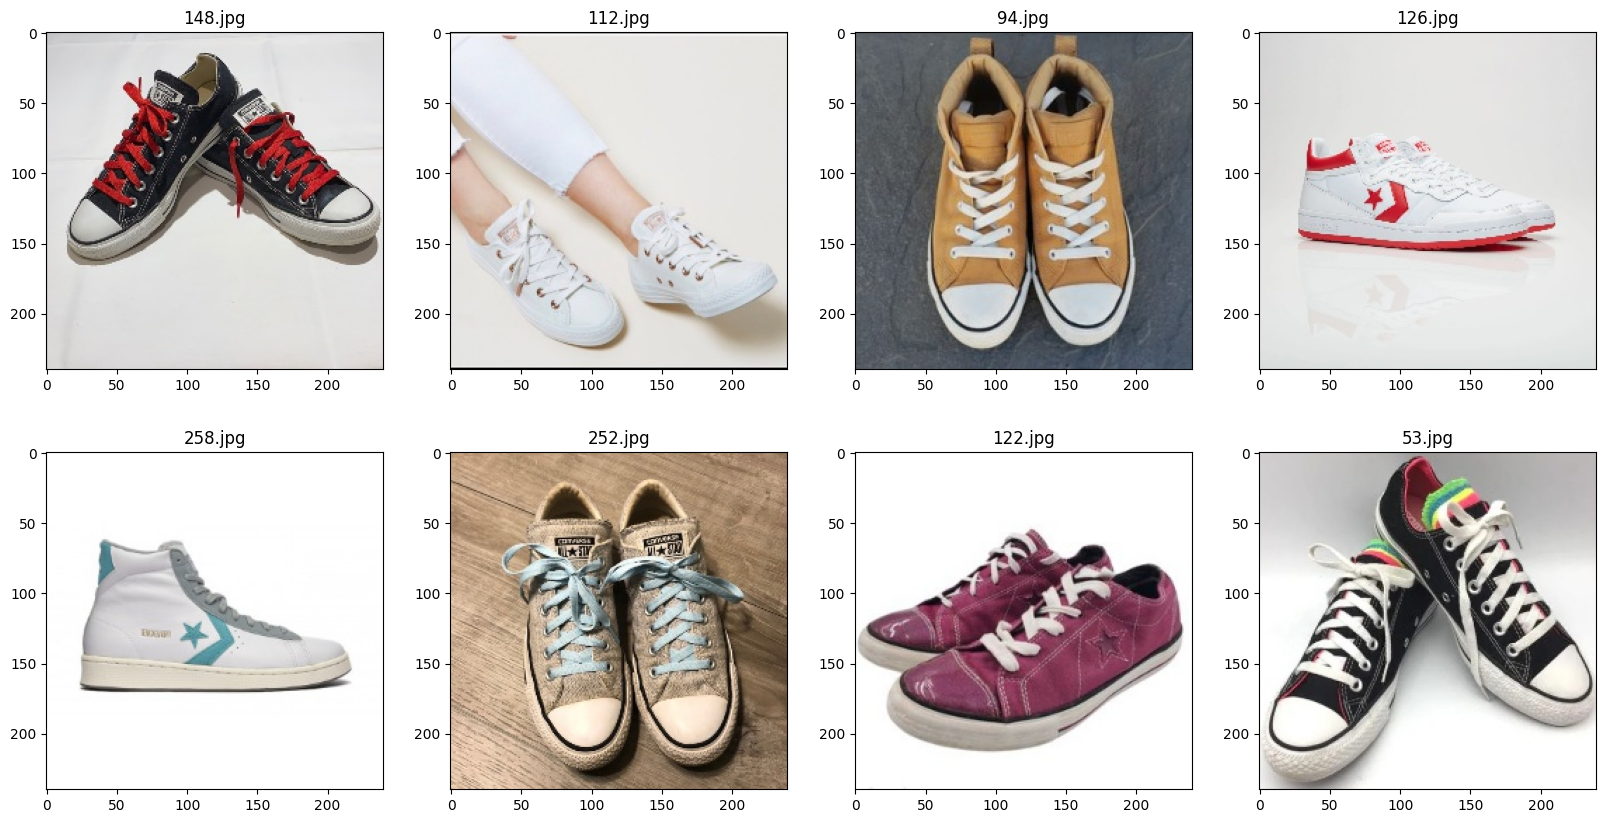

In [45]:
def show_images(random_images, title):
    plt.figure(figsize=(20,10))
    for i in range(8):
        img = mpimg.imread('archive-6/train/' + title + '/' + random_images[i])
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(random_images[i])
    plt.show()

show_images(rand_adidas, "adidas")
show_images(rand_converse, "nike")
show_images(rand_nike, "converse")

# PREPROCESSING

We need to `preprocess the images` in the training data to ensure that all images have the same `height, width, and color channels`. This can be done by `resizing and converting` the images to a uniform size and format and others, Additionally, it's common practice to normalize the `pixel values` of the images to ensure that they fall within a specific range. This helps to reduce the variance in the data and can improve model training. Furthermore, it's often necessary to augment the training data by performing operations such as `rotation, flipping, cropping, and adding noise`. This can help to increase the diversity of the training data and `reduce overfitting.`

In summary, `preprocessing` the training data is a crucial step in building an accurate and effective `deep learning model` for image analysis. By normalizing the data, `augmenting it`, and removing irrelevant information, you can help to ensure that the model has a solid foundation for learning.

First things we need to do is the `horizontal_flip` argument is set to True, which means that the generator will randomly flip the images horizontally. This can help increase the amount of training data, which can help the `model generalize better`.

In [7]:
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   fill_mode='nearest')


generate batches of augmented image data from the specified directories, train_dir and test_dir.

In [8]:
train = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (240,240), class_mode = "categorical", shuffle = False)
val = train_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (240,240), class_mode = "categorical")

Found 114 images belonging to 3 classes.
Found 711 images belonging to 3 classes.


This code is plotting a grid of 16 images, arranged in 2 rows and 8 columns, This code will display 16 random images from the train generator, along with their labels, in a grid format.

/Users/iqbaljanitra/miniforge3/envs/tensorflow/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


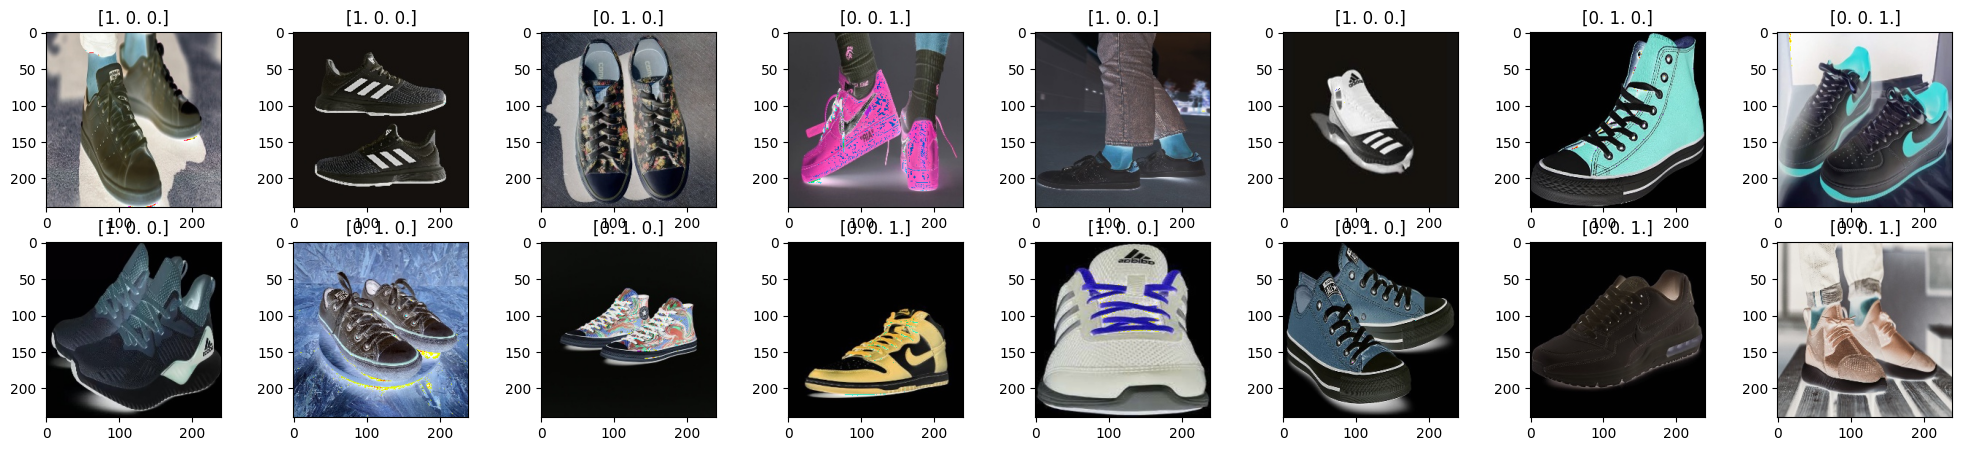

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))
n = 0
for i in range(2):
  for j in range(8):
    batch = train.next()
    img = (batch[0][n] * 255).astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(batch[1][n])
    n += 1

In [10]:

train_datagen1 = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,                               
                                  )

val_datagen1 = ImageDataGenerator(rescale = 1./255)

The class allows to apply data augmentation techniques such as `rescaling, rotation, and shifting` to the training data, which can help increase the size and diversity of the training data, and prevent overfitting. The class also supports preprocessing techniques like normalization of pixel values, which can help `improve the training of deep learning models.`

In [11]:
train1 = train_datagen1.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (240,240), class_mode = "categorical", shuffle = False)
val1 = val_datagen1.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (240,240), class_mode = "categorical")

Found 114 images belonging to 3 classes.
Found 711 images belonging to 3 classes.


The code you provided displays a grid of `16 images`, which are the augmented images generated by the train_datagen1 generator. By visualizing the augmented images, you can get a sense of the types of transformations that are being applied to the original images. but i think we need to improving the image generator can help increase the size and diversity of the training data, which can help prevent overfitting and improve the performance of deep learning models. This can be achieved by adding more augmentation techniques such as random cropping, flipping, and shearing. It's important to experiment with different types and levels of data augmentation to determine the best approach for a given problem.

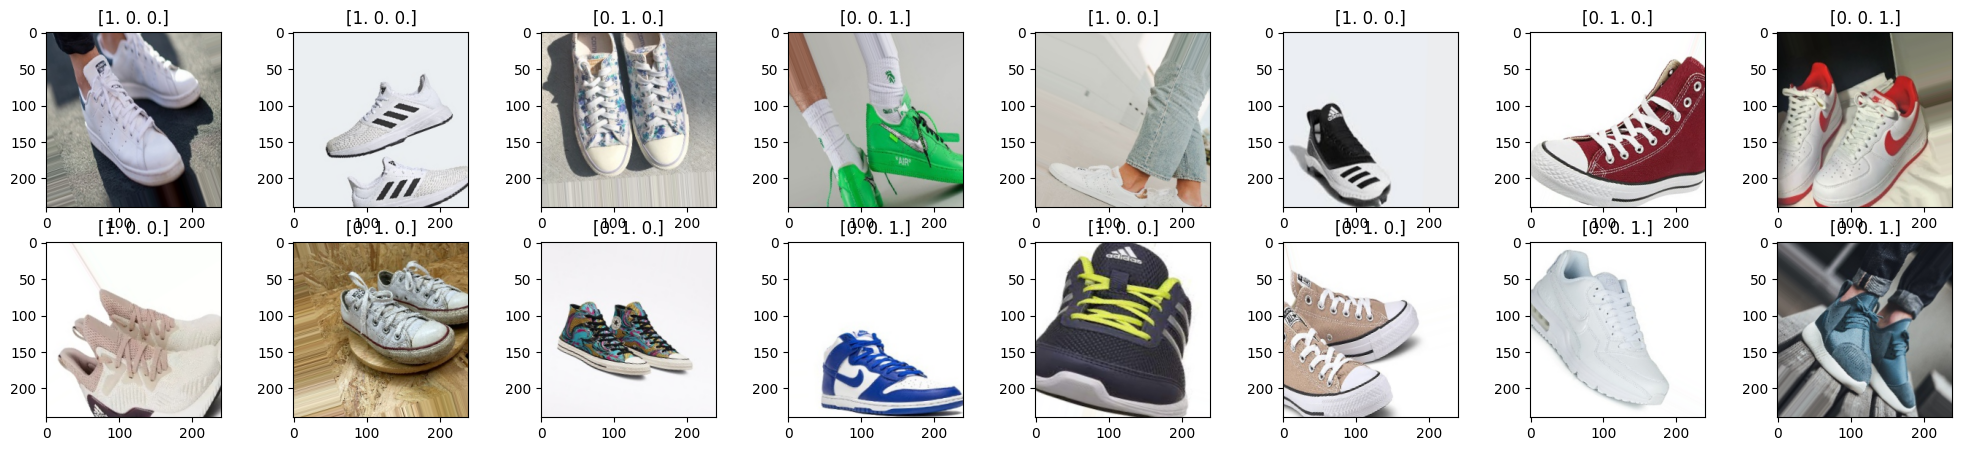

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))
n = 0
for i in range(2):
  for j in range(8):
    batch = train1.next()
    img = (batch[0][n] * 255).astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(batch[1][n])
    n += 1

this image generator seems to include several `useful data augmentation techniques`, such as `rescaling, rotation, shifting, shearing, zooming, and flipping`. The generator also has a validation_split parameter set to `0.1,` which splits a portion of the training data for validation. This is a common practice in deep learning, where the validation data is used to monitor the performance of the model during training and to prevent overfitting.

By using a `well-designed image generator`, you can increase the size and diversity of your training data and improve the `performance of our deep learning models.`

In [13]:
final_train_datagen = ImageDataGenerator(rescale = 1./ 255, 
                                   rotation_range = 120,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   validation_split=0.1,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,) 
final_val_datagen = ImageDataGenerator(rescale=1 / 255,
                                       validation_split=0.1)
                               

The `train_final` and `val_final` data generators are used as input to a `deep learning model`. They provide a convenient way to load and preprocess image data for training and validation.

By using `flow_from_directory`, the generator automatically loads the image data from the specified directories `train_dir and test_dir`, resizes each image to a target size of `240,240`, and converts the target class labels into categorical format. The shuffle parameter is set to False for the `train_final generator`, which means that the training data will not be shuffled during the `training process`. For the `val_final generator`, the shuffle parameter is not specified, so it will use the default value of True, `which means that the validation data will be shuffled.`

In [14]:
train_final = final_train_datagen.flow_from_directory(directory = train_dir, target_size = (240,240), class_mode = "categorical", shuffle = False)
val_final = final_val_datagen.flow_from_directory(directory = test_dir, target_size = (240,240), class_mode = "categorical")

Found 114 images belonging to 3 classes.
Found 711 images belonging to 3 classes.


This code defines two ImageDataGenerators, `train_final` and `val_final`. The train_final generator is used to load and preprocess the training data, which consists of 114 images belonging to 3 classes: Adidas, Converse, and Nike. The images are rescaled to a target size of `(240,240)` and the `class_mode` is set to `categorical`. The shuffle option is set to False, which means that the images will not be shuffled in each epoch.

Similarly, the `val_final` generator is used to load and preprocess the validation data, which consists of `711 images belonging to 3 classes`. The target size and class_mode are set in the same way as for the training data. the final_train_datagen and final_val_datagen are used for training the model

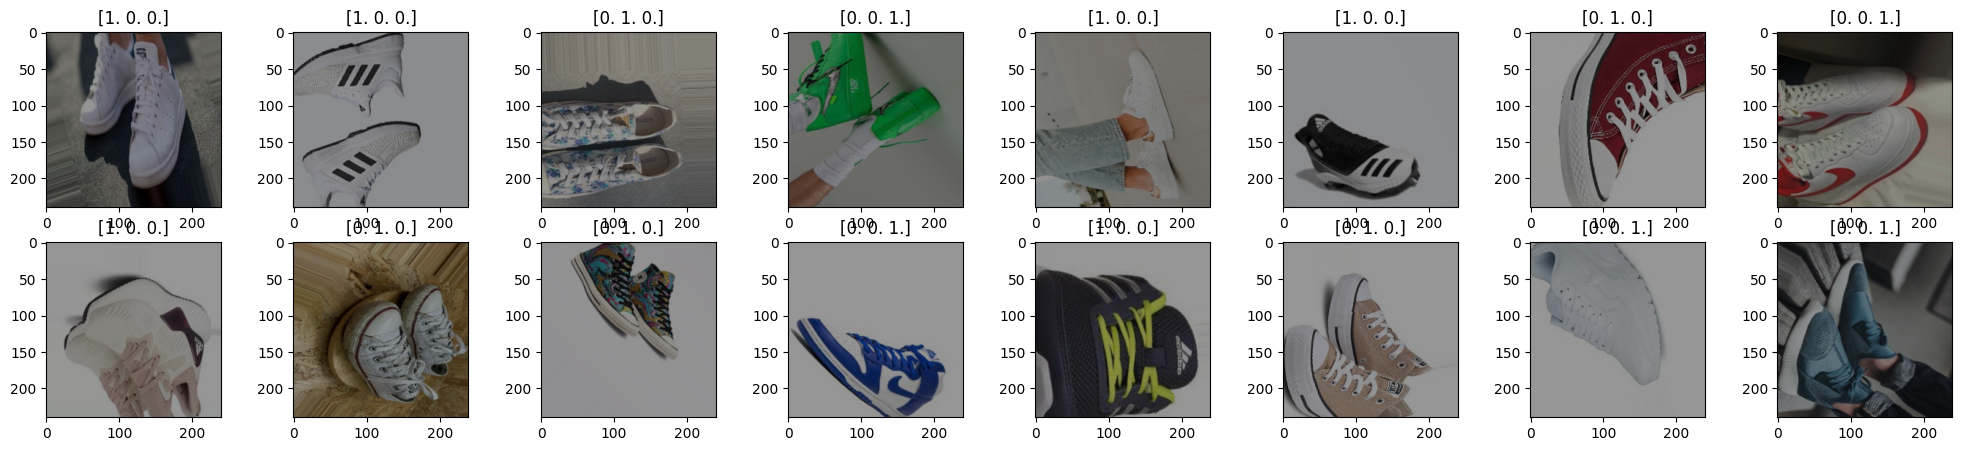

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))
n = 0
for i in range(2):
  for j in range(8):
    batch = train_final.next()
    img = (batch[0][n] * 150).astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(batch[1][n])
    n += 1

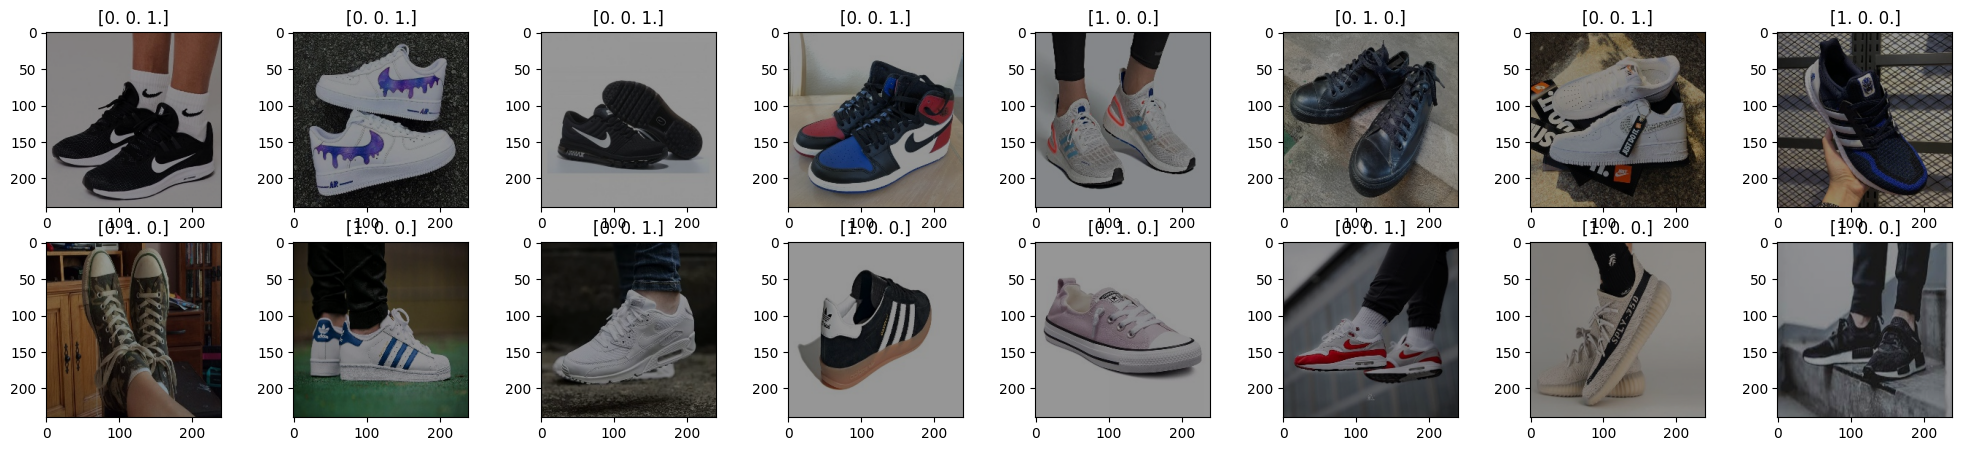

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))
n = 0
for i in range(2):
  for j in range(8):
    batch = val_final.next()
    img = (batch[0][n] * 150).astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(batch[1][n])
    n += 1

### Callback

In this code, several `callbacks` are defined to monitor and improve the training process of the image classification model. A `ModelCheckpoint` callback is created `to save the best version of the model based on the validation loss`. An `EarlyStopping` callback is also created to `stop the training process` if there's no improvement in the validation loss after 3 epochs. Furthermore, a `ReduceLROnPlateau` callback is used to `reduce the learning rate of the model if there's no improvement in the validation loss for 3 consecutive epochs.` These callbacks work together to ensure that the training process is optimized and the best version of the model is saved.

In [17]:

checkpoint = ModelCheckpoint('bestmodelshoesprediction.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

## MODEL CNN

`This is the model before improvement,` which is a basic deep neural network architecture for `image classification`. Further improvements can be made to the model to increase its accuracy and performance, such as adding more layers, changing the activation functions, using different initializers, or using more complex pooling strategies. the model defined here is a simple 4-layer deep neural network for image classification. The model starts with a `GlobalAveragePooling2D` layer to reduce the spatial dimensions of the input image, followed by two dense (fully connected) layers with 128 and 64 neurons respectively, using the `tanh activation function.`

In [29]:
model = Sequential([tf.keras.layers.GlobalAveragePooling2D(),
                      tf.keras.layers.Dense(128, activation = "tanh",kernel_initializer='normal'),
                      tf.keras.layers.Dense(64, activation = "tanh",kernel_initializer='normal'),
                      tf.keras.layers. Dense(3, activation = "sigmoid",kernel_initializer='normal')])

model.layers[0].trainable = False

model.build(input_shape=(None, 240, 240, 3))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_5   (None, 3)                0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 128)               512       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 8,963
Trainable params: 8,963
Non-trainable params: 0
_________________________________________________________________


`Setting up the optimization,` loss, and evaluation metrics for a `deep` learning model in keras library. The model is using the `Adam optimizer`, binary_crossentropy loss function, and accuracy metric to evaluate its performance.

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_final, epochs = 25, validation_data = val_final)

Epoch 1/25


2023-02-11 13:27:17.258236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.1667

2023-02-11 13:27:18.123147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 421ms/step - loss: 0.6954 - accuracy: 0.1667 - val_loss: 0.6889 - val_accuracy: 0.3333
Epoch 2/25
4/4 [==============================] - 1s 334ms/step - loss: 0.6880 - accuracy: 0.3333 - val_loss: 0.6834 - val_accuracy: 0.3333
Epoch 3/25
4/4 [==============================] - 1s 357ms/step - loss: 0.6824 - accuracy: 0.3333 - val_loss: 0.6782 - val_accuracy: 0.3333
Epoch 4/25
4/4 [==============================] - 1s 361ms/step - loss: 0.6763 - accuracy: 0.3333 - val_loss: 0.6726 - val_accuracy: 0.3333
Epoch 5/25
4/4 [==============================] - 1s 336ms/step - loss: 0.6712 - accuracy: 0.3333 - val_loss: 0.6666 - val_accuracy: 0.3333
Epoch 6/25
4/4 [==============================] - 1s 332ms/step - loss: 0.6659 - accuracy: 0.3333 - val_loss: 0.6607 - val_accuracy: 0.3333
Epoch 7/25
4/4 [==============================] - 1s 345ms/step - loss: 0.6595 - accuracy: 0.3333 - val_loss: 0.6550 - val_accuracy: 0.3333
Epoch 8/25
4/4 [===============

`The deep learning model's results show that the model is not performing well`, as the accuracy remains at around `33%` and the loss remains high. The model's performance has not improved over time and is not showing any signs of improvement. In order to improve the model's performance, further changes and optimizations need to be made.

It appears that this deep learning model is `underperforming` as indicated by its low accuracy and high loss. The accuracy and loss are consistent throughout the training process and have not shown significant improvement after several epochs. The accuracy remains constant at around 33.33% which is indicative of a model that is not learning from the data. This means that the model is not able to correctly predict the target class for the majority of the samples in the validation set. `The training loss and validation loss are also quite high, which suggests that the model is not fitting the data well.`


### MODEL CNN VISUALIZATION

Text(0.5, 0, 'Epoch')

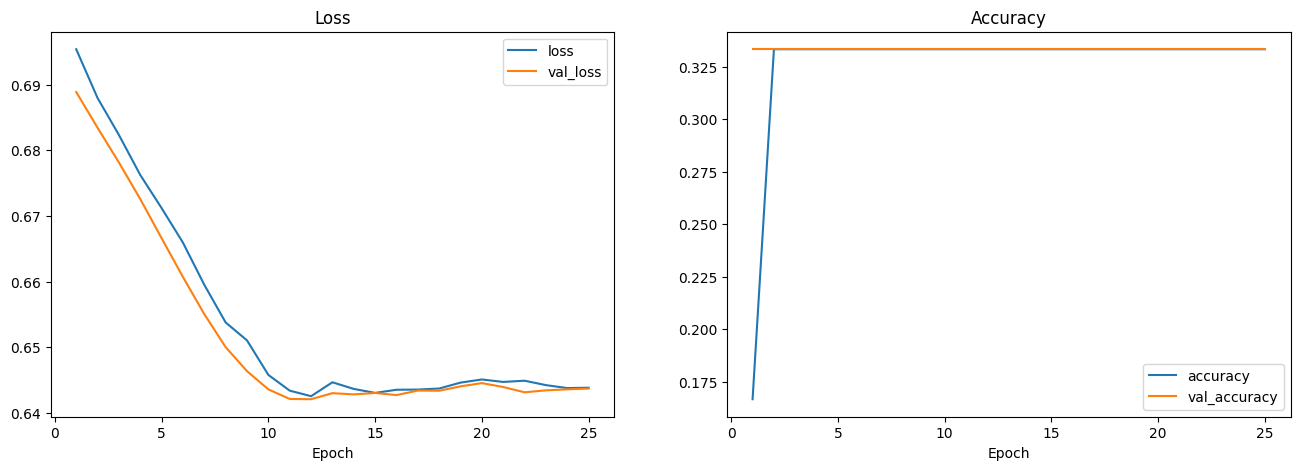

In [32]:
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

# MODEL CNN IMPROVEMENT

### MODEL TRAINING

`The improved model is a deep neural network consisting of 5 layers.` It uses a pre-trained `ResNet50V2 network as the first layer`, which is a state-of-the-art deep residual network for image classification tasks. The ResNet50V2 network is set to not trainable, meaning its weights will not be updated during the training process.

After the ResNet50V2 layer, the model continues with a `GlobalAveragePooling2D` layer for downsampling the spatial dimensions of the input image, followed by two dense (fully connected) layers with `128 and 64 neurons respectively`, using the tanh activation function. Finally, the output layer has 3 neurons with a sigmoid activation function to produce the final classification output.

This improved model leverages the pre-trained `ResNet50V2 network,` which can be expected to provide `good results in the image classification task`, and fine-tunes it with the added layers to produce the final output.

In [39]:
mnet = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(300, 300, 3))
modelimp = Sequential([mnet,
                      tf.keras.layers.GlobalAveragePooling2D(),
                      tf.keras.layers.Dense(128, activation = "tanh",kernel_initializer='normal'),
                      tf.keras.layers.Dense(64, activation = "tanh",kernel_initializer='normal'),
                      tf.keras.layers. Dense(3, activation = "sigmoid",kernel_initializer='normal')])
    
modelimp.layers[0].trainable = False
modelimp.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 10, 10, 2048)      23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 128)               262272    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 23,835,523
Trainable params: 270,723
Non-trainable params: 23,564,800
____________________________________

In [40]:
modelimp.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy','Recall'])

Compiles the image `classification model`, setting the `optimizer`, loss function, and metrics to be used during the training process. The optimizer used is the Adam optimizer with a learning rate of 0.001. The loss function used is binary cross-entropy, which is appropriate for a multi-class classification problem with a sigmoid activation function in the output layer. The metrics used to evaluate the model's performance during training and validation are `accuracy and recall,` which are commonly used metrics for image `classification problems.`

In [41]:
historyimp = modelimp.fit(train_final, epochs = 30, steps_per_epoch = len(train_final), 
                    validation_data = val_final, callbacks=[earlystop,reduce_lr,checkpoint])

Epoch 1/30


2023-02-10 18:50:41.907230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.7381 - accuracy: 0.1140 - recall: 0.1140

2023-02-10 18:50:45.397424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.64600, saving model to bestmodelshoesprediction.h5
4/4 [==============================] - 14s 4s/step - loss: 0.7381 - accuracy: 0.1140 - recall: 0.1140 - val_loss: 0.6460 - val_accuracy: 0.3713 - val_recall: 0.0028 - lr: 0.0010
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 0.6440 - accuracy: 0.3772 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.64600 to 0.63549, saving model to bestmodelshoesprediction.h5
4/4 [==============================] - 10s 3s/step - loss: 0.6440 - accuracy: 0.3772 - recall: 0.0000e+00 - val_loss: 0.6355 - val_accuracy: 0.3319 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.6284 - accuracy: 0.3421 - recall: 0.0000e+00
Epoch 3: val_loss improved from 0.63549 to 0.62720, saving model to bestmodelshoesprediction.h5
4/4 [==============================] - 10s 3s/step - loss: 0.6284 - accuracy: 0.3421 - recall: 0.0000e+00 - val_loss: 0.6272 

`The model seems to be performing well on training and validation data` as the loss and accuracy metrics are improving over time and being saved after every epoch where the performance improves. The recall metric, however, is not improving much and is still at a `low value,` indicating that the model may have `difficulty in correctly identifying some classes`. It could be a result of `imbalanced data or a low number of training samples for certain classes`. It would be necessary to analyze the data and fine-tune the model accordingly. `Overall, the model has the potential to improve with further optimization.`

### MODEL CNN IMPROVED VISUALIZATION

Text(0.5, 0, 'Epoch')

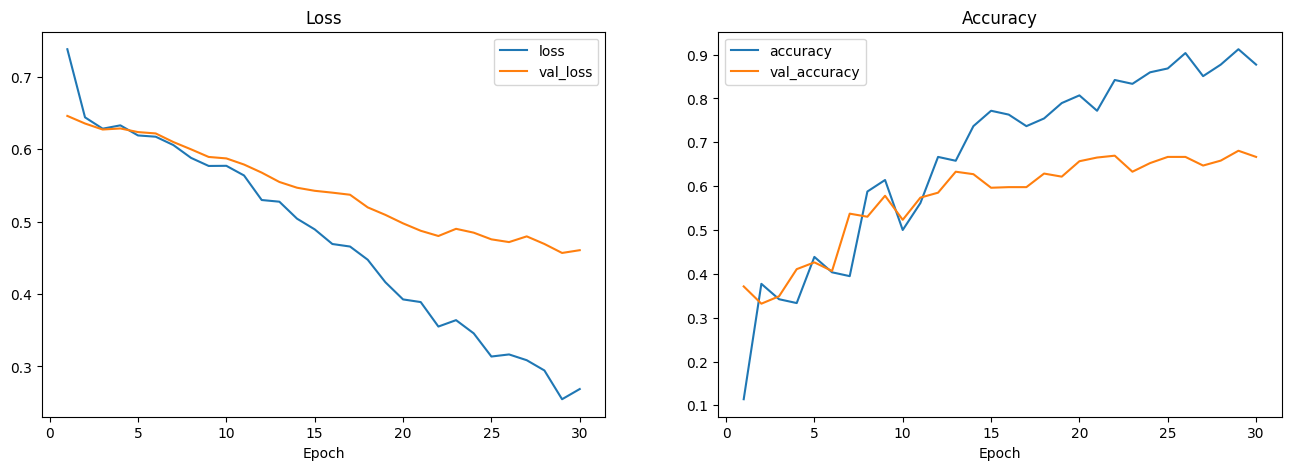

In [42]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),historyimp.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),historyimp.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),historyimp.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),historyimp.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

# CONCLUSION

`The image classification model is designed to predict shoes brand`, with three categories: `Adidas, Converse, and Nike`. The model uses `ResNet50V2 as a base model` and adds several layers on top of it to perform the final classification. The model is trained using an ImageDataGenerator that performs various data augmentation techniques like `rescaling, rotation, shearing, zooming, and flipping to increase the diversity of the training data.` Overall, the model is designed to `accurately classify` the brand of shoes in an image.

In this case, it seems like the model used for the image classification of shoes brands is not `performing well`. This could be due to several reasons, such as a `lack of training data, a lack of data diversity, or an insufficient model architecture`. Improving the performance of the model may require additional data or adjusting the model architecture to `better fit the problem.`

Therefore, it is important to carefully analyze the performance of the model and identify areas that `need improvement.` This can be done by studying the `confusion matrix,examining the accuracy and loss during training, and exploring different `hyperparameter settings.` Additionally, `feature engineering and data augmentation techniques` can also be used to improve the performance of the model. In conclusion, developing an effective image classification model requires a systematic approach and continuous `experimentation` to identify the best solutions for a given problem.

# MODEL SAVING

In [76]:
modelimp.save('modelimpfinal.h5')